In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Create Dataframe

In [5]:
percent_EUR = np.arange(0, 100, 0.1)
df = pd.DataFrame(percent_EUR, columns=['%_EUR'])
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Gas Rate Function

In [6]:
def equrve_func(df):
    
    # Type Curves Input
    end_incl_per = 10.428
    ini_incl_rate = 0.345
    incl_fact = 0.285
    end_plat_per = 40.473
    plat_rate = 6.697
    str_dec_per = 40.473
    ini_dec_rate = 17.787
    dec_fact = -0.024
    
    # 2nd Input
    EUR = 12.944 # BSCF
    Pi = 2700 # psia
    CGRi = 5 # STB/MMSCF
    Qg_abd = 0.7698 # MMSCF/D
    Pabd = 700 # psia
    CGR_limit = 500 # STB/MMSCF
    WGR_limit = 1000 # STB/MMSCF
    Downtime = 100 # %
    
    # Gas Rate
#     for i in range(0, len(df)):
#         if df.loc[i, '%_EUR'] <= end_incl_per:
#             gas_rate = ini_incl_rate*(np.exp((df.loc[i, '%_EUR'])*incl_fact))
#         elif df.loc[i, '%_EUR'] < str_dec_per:
#             gas_rate = plat_rate
#             if ini_dec_rate*np.exp(df.loc[i, '%_EUR']*dec_fact) > plat_rate:
#                 gas_rate = plat_rate
#             else:
#                 gas_rate = ini_dec_rate*np.exp(df.loc[i, '%_EUR']*dec_fact)
#         else:
#             gas_rate = np.nan
#         df.loc[i,'Gas_Rate'] = round(gas_rate,3) 
        
        
    # New Gas Rate    
    for i in range(0, len(df)):        
        if df.loc[i, '%_EUR'] <= end_incl_per:
            gas_rate = ini_incl_rate*(np.exp((df.loc[i, '%_EUR'])*incl_fact))
        else:
            if df.loc[i, '%_EUR'] < str_dec_per:
                gas_rate = plat_rate
            elif ini_dec_rate*np.exp(df.loc[i, '%_EUR']*dec_fact) > plat_rate:
                gas_rate = plat_rate
            else:
                gas_rate = ini_dec_rate*np.exp(df.loc[i, '%_EUR']*dec_fact)
        df.loc[i,'Gas_Rate'] = round(gas_rate,3) 
    
    # CGR
    for i in range(0, len(df)):
        if end_plat_per < str_dec_per: # if true
            if df.loc[i, '%_EUR'] <= end_incl_per:
                CGR_CGRi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    CGR_CGRi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        CGR_CGRi = plat_rate
                    else:
                        CGR_CGRi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else: # if false
            if df.loc[i, '%_EUR'] <= end_incl_per:
                CGR_CGRi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    CGR_CGRi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        CGR_CGRi = plat_rate
                    else:
                        CGR_CGRi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
                                
        df.loc[i,'CGR_CGRi'] = round(CGR_CGRi,3) 
        
        # CGR
        CGR = df.loc[i, 'CGR_CGRi']*CGRi
        df.loc[i, 'CGR'] = round(CGR, 3)    
        
    # WGR
    for i in range(0, len(df)):
        if end_plat_per < str_dec_per:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                WGR = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    WGR = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        WGR = plat_rate
                    else:
                        WGR = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                WGR = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    WGR = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        WGR = plat_rate
                    else:
                        WGR = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))

        df.loc[i,'WGR'] = round(WGR,3)
        
    # Pr_Pi   
    for i in range(0, len(df)):
        if end_plat_per < str_dec_per:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                pr_pi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    pr_pi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        pr_pi = plat_rate
                    else:
                        pr_pi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                pr_pi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    pr_pi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        pr_pi = plat_rate
                    else:
                        pr_pi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
            
        df.loc[i,'Pr_Pi'] = round(pr_pi,3)
        
        # PRES
        pres = df.loc[i, 'Pr_Pi']*Pi
        df.loc[0, 'PRES'] = Pi
        df.loc[i, 'PRES'] = pres
    
    # Others
    for i in range(0, len(df)):
# if ((df.loc[i, 'Gas_Rate']/100)*(EUR/365)*1000 >= Qg_abd) and (df.loc[i, 'PRES'] >= Pabd) and (df.loc[i, 'CGR'] <= CGR) and (df.loc[i, 'WGR'] <= WGR)        
        # Find Qg
        if df.loc[i, '%_EUR'] > end_incl_per:
            if ((df.loc[i, 'Gas_Rate']/100)*(EUR/365)*1000 >= Qg_abd) and (df.loc[i, 'PRES'] >= Pabd) and (df.loc[i, 'CGR'] <= CGR_limit) and (df.loc[i, 'WGR'] <= WGR_limit):
                Qg = (df.loc[i, 'Gas_Rate']/100)*(EUR/365)*1000*(Downtime/100)
            else:
                Qg = np.nan
        else:
            Qg = (df.loc[i, 'Gas_Rate']/100)*(EUR/365)*1000*(Downtime/100)
        df.loc[i, 'Qg'] = round(Qg, 4)    
        
        # Find Cum GP
        Cum_GP = (df.loc[i, '%_EUR']/100) * EUR
        df.loc[i, 'Cum_GP'] = round(Cum_GP, 3)
        
        # Find no. of days
        df['No_of_Days'] = round((df['Cum_GP'] - df['Cum_GP'].shift(1))*1000/df['Qg'])
        df.loc[0, 'No_of_Days'] = 0

        # Find Cum Days
        df['Cum_Days'] = df.No_of_Days.cumsum()
        
        # Find Cum Month
        df['Cum_Month'] = round(df.Cum_Days/30)
        
        # Find Cum Year
        df['Cum_Year'] = round(df.Cum_Days/365, 1)
        
        # Find Qc
        df['Qc'] = round(df['Qg']*df['CGR'], 2)
        
        # Find Qw
        df['Qw'] = round(df['Qg']*df['WGR'], 2)
        
        # Compiling all the columns
        df = df[['%_EUR', 'Gas_Rate','CGR_CGRi', 'WGR', 'Pr_Pi', 'Qg', 'CGR', 'PRES', 'Cum_GP', 'No_of_Days', 
                 'Cum_Days', 'Cum_Month', 'Cum_Year', 'Qc', 'Qw']]
        
    return df

In [7]:
test_1 = equrve_func(df) 

In [8]:
test_1

,%_EUR,Gas_Rate,CGR_CGRi,WGR,Pr_Pi,Qg,CGR,PRES,Cum_GP,No_of_Days,Cum_Days,Cum_Month,Cum_Year,Qc,Qw
0,0.0,0.345,0.345,0.345,0.345,0.1223,1.725,2700.0,0.000,0.0,0.0,0.0,0.0,0.21,0.04
1,0.1,0.355,0.355,0.355,0.355,0.1259,1.775,958.5,0.013,103.0,103.0,3.0,0.3,0.22,0.04
2,0.2,0.365,0.365,0.365,0.365,0.1294,1.825,985.5,0.026,100.0,203.0,7.0,0.6,0.24,0.05
3,0.3,0.376,0.376,0.376,0.376,0.1333,1.880,1015.2,0.039,98.0,301.0,10.0,0.8,0.25,0.05
4,0.4,0.387,0.387,0.387,0.387,0.1372,1.935,1044.9,0.052,95.0,396.0,13.0,1.1,0.27,0.05
5,0.5,0.398,0.398,0.398,0.398,0.1411,1.990,1074.6,0.065,92.0,488.0,16.0,1.3,0.28,0.06
6,0.6,0.409,0.409,0.409,0.409,0.1450,2.045,1104.3,0.078,90.0,578.0,19.0,1.6,0.30,0.06
7,0.7,0.421,0.421,0.421,0.421,0.1493,2.105,1136.7,0.091,87.0,665.0,22.0,1.8,0.31,0.06
8,0.8,0.433,0.433,0.433,0.433,0.1536,2.165,1169.1,0.104,85.0,750.0,25.0,2.1,0.33,0.07
9,0.9,0.446,0.446,0.446,0.446,0.1582,2.230,1204.2,0.116,76.0,826.0,28.0,2.3,0.35,0.07


## Plot of Gas Rate and Cumulative Gas vs Time

In [9]:
x = test_1['Cum_Year']
y1 = test_1['Qg']
y2 = test_1['Cum_GP']
# print(x, y)

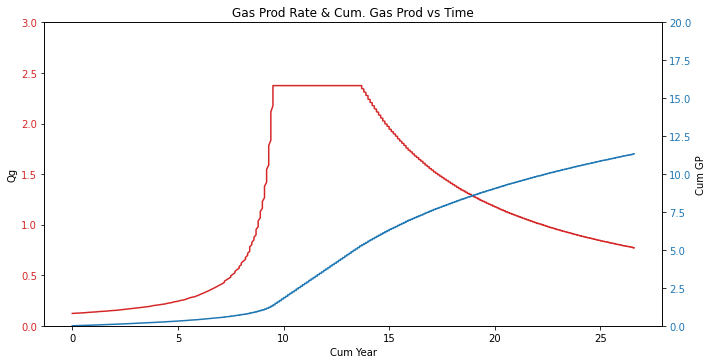

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:red'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('Qg')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)
ax1.set_ylim(0, 3)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Cum GP')
ax2.plot(x, y2, color = color)
ax2.tick_params(axis='y', labelcolor = color)
ax2.set_ylim(0, 20)

fig.tight_layout()
plt.title('Gas Prod Rate & Cum. Gas Prod vs Time')
plt.show()

## Plot of Condensate Rate and Condensate Gas Ratio vs Time

In [15]:
x = test_1['Cum_Year']
y1 = test_1['CGR_CGRi']
y2 = test_1['CGR']

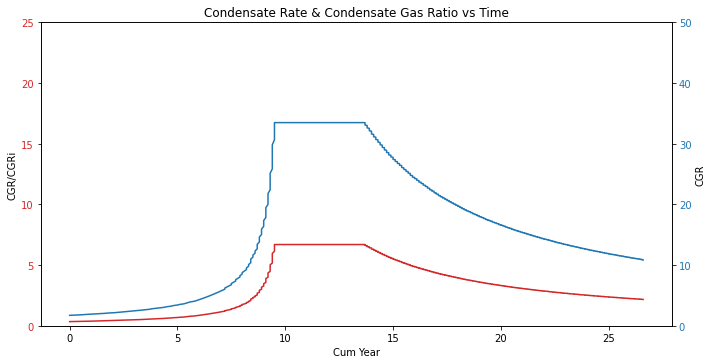

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:red'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('CGR/CGRi')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)
ax1.set_ylim(0, 25)

# Overlap Plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CGR')
ax2.plot(x, y2, color = color)
ax2.tick_params(axis='y', labelcolor = color)
ax2.set_ylim(0, 50)

fig.tight_layout()
plt.title('Condensate Rate & Condensate Gas Ratio vs Time')
plt.show()

## Plot of Water Rate and Water Gas Ratio vs Time

In [21]:
x = test_1['Cum_Year']
y1 = test_1['WGR']

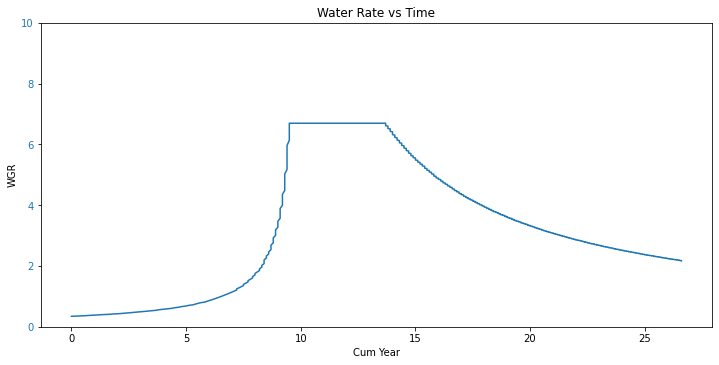

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('WGR')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.title('Water Rate vs Time')
plt.ylim(0, 10)
plt.show()

## Plot of Reservoir Pressure vs Time

In [23]:
x = test_1['Cum_Year']
y1 = test_1['PRES']

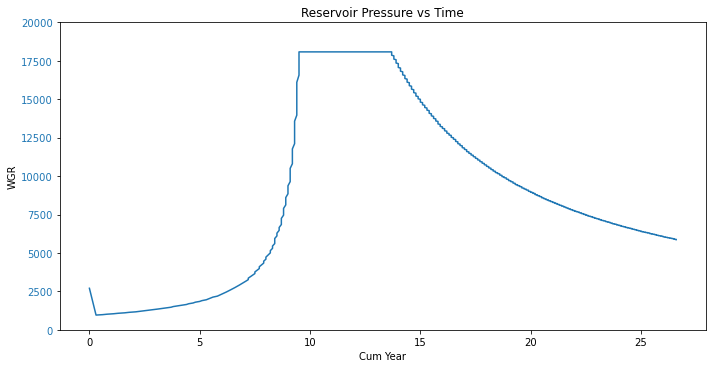

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('WGR')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.title('Reservoir Pressure vs Time')
plt.ylim(0, 20000)
plt.show()

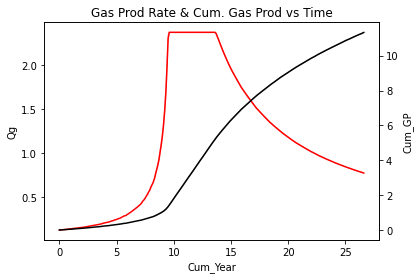

In [140]:
ax = sns.lineplot(data=test_1, x='Cum_Year', y='Qg', color = 'red')
ax2 = plt.twinx()
sns.lineplot(data=test_1, x='Cum_Year', y = 'Cum_GP', color='black', ax=ax2)
ax.set_title('Gas Prod Rate & Cum. Gas Prod vs Time')
plt.show()

## CGR Function

In [12]:
def cgr_func(df):
    
    # Type Curves Input
    end_incl_per = 9
    ini_incl_rate = 0.3
    incl_fact = 0.3
    end_plat_per = 45
    plat_rate = 7.0
    str_dec_per = 45
    ini_dec_rate = 19
    dec_fact = -0.02
    
    # 2nd Input
    EUR = 12.944 # BSCF
    Pi = 2700 # psia
    CGRi = 5 # STB/MMSCF
    Qg_abd = 1 # MMSCF/D
    Pabd = 700 # psia
    CGR = 500 # STB/MMSCF
    WGR = 1000 # STB/MMSCF
    Downtime = 100 # %
    
    for i in range(0, len(df)):
        if end_plat_per < str_dec_per:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                CGR_CGRi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    CGR_CGRi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        CGR_CGRi = plat_rate
                    else:
                        CGR_CGRi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                CGR_CGRi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    CGR_CGRi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        CGR_CGRi = plat_rate
                    else:
                        CGR_CGRi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
                                
        df.loc[i,'CGR_CGRi'] = round(CGR_CGRi,3) 
        
        # CGR
        CGR = df.loc[i, 'CGR_CGRi']*CGRi
        df.loc[i, 'CGR'] = round(CGR, 3)
        
        df = df[['%_EUR', 'CGR_CGRi', 'CGR']]
        
    return df

In [13]:
df_cgr = cgr_func(df)

In [14]:
df_cgr

,%_EUR,CGR_CGRi,CGR
0,0.0,0.300,1.500
1,0.1,0.309,1.545
2,0.2,0.319,1.595
3,0.3,0.328,1.640
4,0.4,0.338,1.690
5,0.5,0.349,1.745
6,0.6,0.359,1.795
7,0.7,0.370,1.850
8,0.8,0.381,1.905
9,0.9,0.393,1.965


In [68]:
df_cgr.tail(10)

,%_EUR,CGR
41,4.1,1.026
42,4.2,1.058
43,4.3,1.090
44,4.4,1.123
45,4.5,1.157
46,4.6,1.192
47,4.7,1.229
48,4.8,1.266
49,4.9,1.305
50,5.0,1.345


## WGR Function

In [15]:
def wgr_func(df):
    
    # Type Curves Input
    end_incl_per = 9
    ini_incl_rate = 0.3
    incl_fact = 0.3
    end_plat_per = 45
    plat_rate = 7.0
    str_dec_per = 45
    ini_dec_rate = 19
    dec_fact = -0.02
    
    # 2nd Input
    EUR = 12.944 # BSCF
    Pi = 0 # psia
    CGRi = 0 # STB/MMSCF
    Qg_abd = 1 # MMSCF/D
    Pabd = 0 # psia
    CGR = 0 # STB/MMSCF
    WGR = 1000 # STB/MMSCF
    Downtime = 100 # %
    
    for i in range(0, len(df)):
        if end_plat_per < str_dec_per:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                WGR = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    WGR = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        WGR = plat_rate
                    else:
                        WGR = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                WGR = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    WGR = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        WGR = plat_rate
                    else:
                        WGR = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))

            
        df.loc[i,'WGR'] = round(WGR,3)     
            
        df = df[['%_EUR', 'WGR']]
        
    return df

In [54]:
df_wgr = wgr_func(df)

In [55]:
df_wgr.tail(10)

,%_EUR,WGR
41,4.1,1.026
42,4.2,1.058
43,4.3,1.090
44,4.4,1.123
45,4.5,1.157
46,4.6,1.192
47,4.7,1.229
48,4.8,1.266
49,4.9,1.305
50,5.0,1.345


# PRES Function

In [16]:
def pres_func(df):
    # Type Curves Input
    end_incl_per = 10
    ini_incl_rate = 0.345
    incl_fact = 0.285
    end_plat_per = 40.47
    plat_rate = 6.7
    str_dec_per = 40
    ini_dec_rate = 18
    dec_fact = -0.02
    
    # 2nd Input
    EUR = 12.944 # BSCF
    Pi = 2700 # psia
    CGRi = 5 # STB/MMSCF
    Qg_abd = 1 # MMSCF/D
    Pabd = 700 # psia
    CGR = 500 # STB/MMSCF
    WGR = 1000 # STB/MMSCF
    Downtime = 100 # %

    for i in range(0, len(df)):
        if end_plat_per < str_dec_per:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                pr_pi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per:
                    pr_pi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        pr_pi = plat_rate
                    else:
                        pr_pi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per:
                pr_pi = ini_incl_rate*(np.exp(df.loc[i, '%_EUR']*incl_fact))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per:
                    pr_pi = plat_rate
                else:
                    if ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact)) > plat_rate:
                        pr_pi = plat_rate
                    else:
                        pr_pi = ini_dec_rate*(np.exp(df.loc[i, '%_EUR']*dec_fact))
            
        df.loc[i,'Pr_Pi'] = round(pr_pi,3)
        
        # PRES
        pres = df.loc[i, 'Pr_Pi']*Pi
        df.loc[0, 'PRES'] = Pi
        df.loc[i, 'PRES'] = round(pres)
            
        df = df[['%_EUR', 'Pr_Pi', 'PRES']]
        
    return df

In [114]:
pres_func(df)

,%_EUR,Pr_Pi,PRES
0,0.0,0.345,2700.0
1,0.1,0.355,958.0
2,0.2,0.365,986.0
3,0.3,0.376,1015.0
4,0.4,0.387,1045.0
5,0.5,0.398,1075.0
6,0.6,0.409,1104.0
7,0.7,0.421,1137.0
8,0.8,0.433,1169.0
9,0.9,0.446,1204.0


# Figuring out the No. of Days

In [102]:
df = pd.DataFrame({"Cum_GP": [0.0000, 0.0129, 0.0259, 0.0388, 0.0518], 
                   "Qg": [0.1223, 0.1258, 0.1295, 0.1332, 0.1371]})

In [103]:
df

,Cum_GP,Qg
0,0.0000,0.1223
1,0.0129,0.1258
2,0.0259,0.1295
3,0.0388,0.1332
4,0.0518,0.1371


In [105]:
df['New Col'] = round((df['Cum_GP'] - df['Cum_GP'].shift(1))*1000/df['Qg'])
df

,Cum_GP,Qg,New Col
0,0.0000,0.1223,NaN
1,0.0129,0.1258,103.0
2,0.0259,0.1295,100.0
3,0.0388,0.1332,97.0
4,0.0518,0.1371,95.0


In [20]:
diff = df.loc[0, 'Cum_GP']
output = []
for i in range(len(df)-1):
    x1 = (((df.loc[i+1, 'Cum_GP'])- diff))/df.loc[i, 'Qg']
    output.append(x1)
    diff = round(x1)
    
output

[0.10547833197056418,
 0.20588235294117646,
 0.2996138996138996,
 0.38888888888888884]

In [21]:
df = pd.DataFrame({"ID": [0, 1, 2, 3, 4], 
                   "VALUE": [1, 10, 30, 45, 78], 
                   "Divider": [3, 2, 3, 2, 3]})
cumsum_with_parity = df.groupby(df.index % 2).VALUE.cumsum()
df["NEWVALUE"] = ((cumsum_with_parity - cumsum_with_parity.shift().fillna(0))*1000)
df['Days'] = ((cumsum_with_parity - cumsum_with_parity.shift().fillna(0))*1000)/df['Divider']

In [22]:
df

,ID,VALUE,Divider,NEWVALUE,Days
0,0,1,3,1000.0,333.333333
1,1,10,2,9000.0,4500.000000
2,2,30,3,21000.0,7000.000000
3,3,45,2,24000.0,12000.000000
4,4,78,3,54000.0,18000.000000


In [23]:
df = pd.DataFrame({"Cum_GP": [0.0000, 0.0129, 0.0259, 0.0388, 0.0518], 
                   "Qg": [0.1223, 0.1258, 0.1295, 0.1332, 0.1371]})
cumsum_with_parity = df.groupby(df.index % 2).Cum_GP.cumsum()
df["No of Days"] = round(((cumsum_with_parity - cumsum_with_parity.shift().fillna(0))*1000)/df['Qg'])

In [24]:
df

,Cum_GP,Qg,No of Days
0,0.0000,0.1223,0.0
1,0.0129,0.1258,103.0
2,0.0259,0.1295,100.0
3,0.0388,0.1332,194.0
4,0.0518,0.1371,190.0


In [84]:
df = pd.DataFrame({"ID": [0, 1, 2, 3, 4], 
                   "VALUE": [1, 10, 30, 45, 78]})